In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report

In [153]:
data = pd.read_csv('spotify_churn_dataset.csv')
data

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [155]:
X = data.drop(['is_churned'], axis=1)
y = data['is_churned']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Data normalizing 

### X_train

In [157]:
X_train.drop(['user_id'], axis=1, inplace=True)

In [158]:
X_train['gender'].value_counts()

gender
Male      2154
Female    2123
Other     2123
Name: count, dtype: int64

In [159]:
X_train['gender'] = X_train['gender'].str.strip().str.lower()

In [160]:
X_train = pd.get_dummies(X_train, columns=['gender'], drop_first=True, dtype='int8')

In [161]:
X_train['country'].value_counts()

country
US    836
IN    831
AU    829
PK    802
DE    790
FR    785
UK    774
CA    753
Name: count, dtype: int64

In [162]:
X_train = pd.get_dummies(X_train, columns=['country'], drop_first=True, dtype='int8')

In [163]:
X_train['subscription_type'].value_counts()

subscription_type
Premium    1695
Free       1602
Student    1581
Family     1522
Name: count, dtype: int64

In [164]:
X_train = pd.get_dummies(X_train, columns=['subscription_type'], drop_first=True, dtype='int8')

In [165]:
X_train['device_type'].value_counts()

device_type
Desktop    2216
Web        2118
Mobile     2066
Name: count, dtype: int64

In [166]:
X_train = pd.get_dummies(X_train, columns=['device_type'], drop_first=True, dtype='int8')

<Axes: >

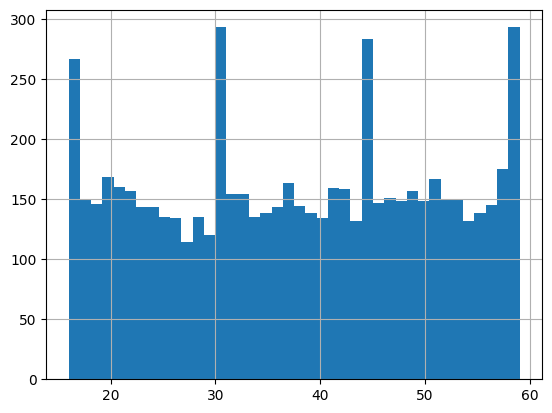

In [167]:
X_train['age'].hist(bins=40)

<Axes: >

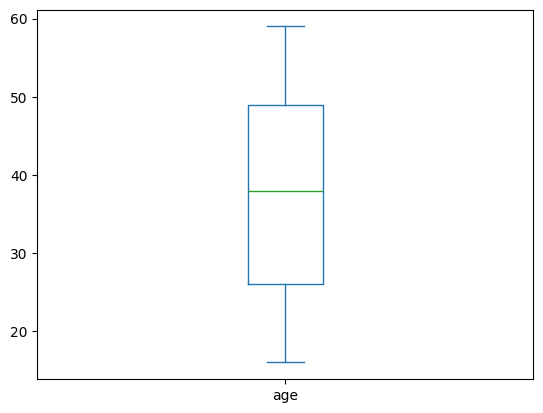

In [168]:
X_train['age'].plot.box()

<Axes: >

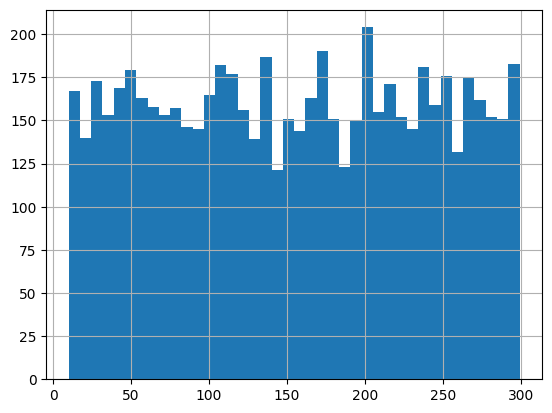

In [169]:
X_train['listening_time'].hist(bins=40)

<Axes: >

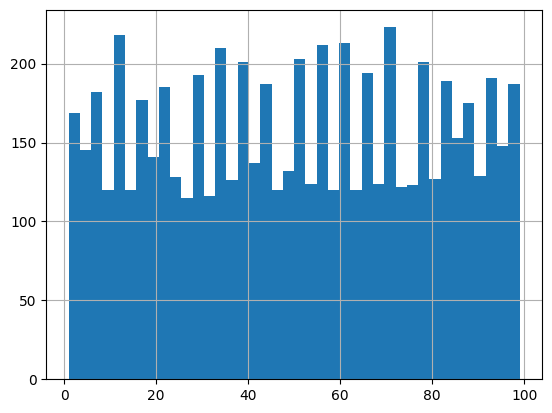

In [170]:
X_train['songs_played_per_day'].hist(bins=40)

<Axes: >

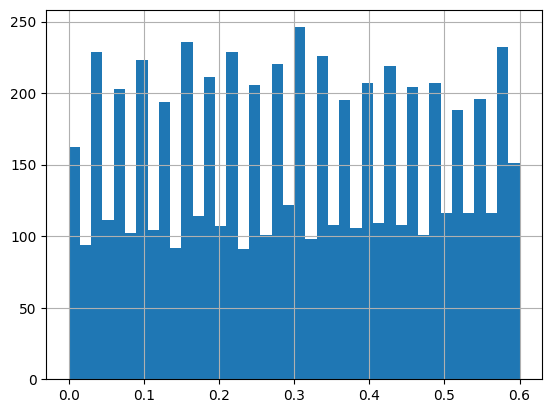

In [171]:
X_train['skip_rate'].hist(bins=40)

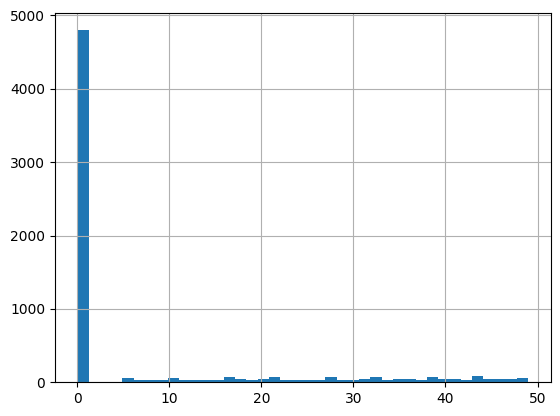

In [172]:
X_train['ads_listened_per_week'].hist(bins=40);

<Axes: >

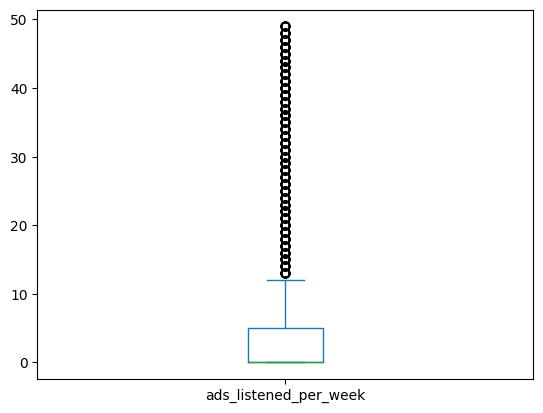

In [173]:
X_train['ads_listened_per_week'].plot.box()

In [174]:
std = StandardScaler()
X_train = pd.DataFrame(std.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

### X_test

In [175]:
X_test.drop(['user_id'], axis=1, inplace=True)
X_test['gender'] = X_test['gender'].str.strip().str.lower()
X_test = pd.get_dummies(X_test, columns=['gender'], drop_first=True, dtype='int8')
X_test = pd.get_dummies(X_test, columns=['country'], drop_first=True, dtype='int8')
X_test = pd.get_dummies(X_test, columns=['subscription_type'], drop_first=True, dtype='int8')
X_test = pd.get_dummies(X_test, columns=['device_type'], drop_first=True, dtype='int8')

X_test = pd.DataFrame(std.transform(X_test), columns=X_test.columns, index=X_test.index)


In [176]:
X_test

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_male,gender_other,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
6016,1.355531,-0.844662,-0.153168,-0.518147,-0.509160,0.577831,1.404000,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,-0.378504,2.696059,-0.387623,-0.577831,-0.600213,1.745873,-0.690432,1.421872
5989,0.649768,0.610684,-0.961686,1.102617,-0.509160,0.577831,-0.712251,1.419367,-0.365165,-0.37526,-0.373904,2.588738,-0.378504,-0.370912,-0.387623,-0.577831,1.666077,-0.572780,-0.690432,-0.703298
6432,0.414513,0.598755,-1.348368,-1.270645,1.404128,-1.730609,1.404000,-0.704540,-0.365165,-0.37526,-0.373904,2.588738,-0.378504,-0.370912,-0.387623,1.730609,-0.600213,-0.572780,-0.690432,1.421872
5315,1.277113,0.324387,0.971726,-0.286609,-0.509160,0.577831,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,2.641978,-0.370912,-0.387623,-0.577831,1.666077,-0.572780,1.448369,-0.703298
3845,-0.683341,-1.297966,-1.383521,1.565693,2.875888,-1.730609,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,-0.378504,2.696059,-0.387623,1.730609,-0.600213,-0.572780,-0.690432,1.421872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,-1.075431,-0.319783,0.303820,-0.865454,-0.509160,0.577831,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,-0.378504,2.696059,-0.387623,-0.577831,1.666077,-0.572780,-0.690432,1.421872
3528,0.336095,-1.405328,1.674785,-0.228725,1.698480,-1.730609,1.404000,-0.704540,-0.365165,2.66482,-0.373904,-0.386289,-0.378504,-0.370912,-0.387623,1.730609,-0.600213,-0.572780,-0.690432,-0.703298
5169,0.022423,0.324387,-0.047709,-1.444299,3.096652,-1.730609,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,2.588738,-0.378504,-0.370912,-0.387623,1.730609,-0.600213,-0.572780,-0.690432,-0.703298
2665,-1.624359,1.171351,1.674785,0.176466,2.287184,-1.730609,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,2.641978,-0.370912,-0.387623,1.730609,-0.600213,-0.572780,1.448369,-0.703298


In [177]:
X_train

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_male,gender_other,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
7665,1.669204,-1.620051,1.639632,0.002813,-0.509160,0.577831,-0.712251,-0.704540,2.738492,-0.37526,-0.373904,-0.386289,-0.378504,-0.370912,-0.387623,-0.577831,1.666077,-0.572780,-0.690432,-0.703298
2264,1.669204,1.529223,-0.785921,-0.691801,-0.509160,0.577831,1.404000,-0.704540,-0.365165,-0.37526,2.674484,-0.386289,-0.378504,-0.370912,-0.387623,-0.577831,-0.600213,1.745873,-0.690432,-0.703298
579,-1.545940,-0.916236,1.463867,-0.228725,1.845656,-1.730609,1.404000,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,2.641978,-0.370912,-0.387623,1.730609,-0.600213,-0.572780,-0.690432,1.421872
6206,1.198695,-1.464973,0.128056,-0.055072,-0.509160,0.577831,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,2.588738,-0.378504,-0.370912,-0.387623,-0.577831,-0.600213,-0.572780,-0.690432,-0.703298
282,-0.526504,-0.689584,-0.469544,1.681462,-0.509160,0.577831,-0.712251,1.419367,-0.365165,-0.37526,-0.373904,-0.386289,-0.378504,-0.370912,-0.387623,-0.577831,1.666077,-0.572780,-0.690432,1.421872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,-0.997013,1.278712,-1.453827,-1.617952,2.066420,-1.730609,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,2.641978,-0.370912,-0.387623,1.730609,-0.600213,-0.572780,1.448369,-0.703298
5103,1.277113,-1.703555,-1.102297,0.928964,-0.509160,0.577831,-0.712251,1.419367,-0.365165,-0.37526,-0.373904,2.588738,-0.378504,-0.370912,-0.387623,-0.577831,1.666077,-0.572780,1.448369,-0.703298
4644,0.963441,1.600797,-1.207756,0.060697,-0.509160,0.577831,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,-0.378504,-0.370912,2.579826,-0.577831,1.666077,-0.572780,-0.690432,-0.703298
901,0.649768,-1.250250,1.112338,-0.923338,-0.509160,0.577831,-0.712251,-0.704540,-0.365165,-0.37526,-0.373904,-0.386289,-0.378504,-0.370912,2.579826,-0.577831,1.666077,-0.572780,-0.690432,1.421872


In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 7665 to 3789
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6400 non-null   float64
 1   listening_time             6400 non-null   float64
 2   songs_played_per_day       6400 non-null   float64
 3   skip_rate                  6400 non-null   float64
 4   ads_listened_per_week      6400 non-null   float64
 5   offline_listening          6400 non-null   float64
 6   gender_male                6400 non-null   float64
 7   gender_other               6400 non-null   float64
 8   country_CA                 6400 non-null   float64
 9   country_DE                 6400 non-null   float64
 10  country_FR                 6400 non-null   float64
 11  country_IN                 6400 non-null   float64
 12  country_PK                 6400 non-null   float64
 13  country_UK                 6400 non-null   float64

## Model learning

In [184]:
model_Log = LogisticRegression()
model_Log.fit(X_train, y_train)
y_pred_Log = model_Log.predict(X_test)

print(accuracy_score(y_test, y_pred_Log), accuracy_score(y_train, model_Log.predict(X_train)))
print(classification_report(y_test, y_pred_Log))

0.748125 0.739375
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1197
           1       0.00      0.00      0.00       403

    accuracy                           0.75      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.56      0.75      0.64      1600



C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [200]:
# y_pred_Log[0:1000]

In [180]:
model_KNN = KNeighborsClassifier(n_neighbors=8)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

print(accuracy_score(y_test, y_pred_KNN), accuracy_score(y_train, model_KNN.predict(X_train)))
print(classification_report(y_test, y_pred_KNN))

0.72625 0.7534375
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1197
           1       0.23      0.04      0.06       403

    accuracy                           0.73      1600
   macro avg       0.49      0.50      0.45      1600
weighted avg       0.62      0.73      0.64      1600



In [202]:
# y_pred_KNN[0:1000]

In [185]:
model_GS = GaussianNB()
model_GS.fit(X_train, y_train)
y_pred_GS = model_GS.predict(X_test)

print(accuracy_score(y_test, y_pred_GS), accuracy_score(y_train, model_GS.predict(X_train)))
print(classification_report(y_test, y_pred_GS))

0.748125 0.739375
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1197
           1       0.00      0.00      0.00       403

    accuracy                           0.75      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.56      0.75      0.64      1600



C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [188]:
model_GS.predict_proba(X_test)[:16]

array([[0.85408991, 0.14591009],
       [0.79554386, 0.20445614],
       [0.86481235, 0.13518765],
       [0.62726459, 0.37273541],
       [0.86169378, 0.13830622],
       [0.70235195, 0.29764805],
       [0.67553051, 0.32446949],
       [0.74312931, 0.25687069],
       [0.85560985, 0.14439015],
       [0.88317711, 0.11682289],
       [0.70072522, 0.29927478],
       [0.71069772, 0.28930228],
       [0.81299728, 0.18700272],
       [0.69674059, 0.30325941],
       [0.85426901, 0.14573099],
       [0.86322587, 0.13677413]])

In [204]:
# y_pred_GS[0:1000]